# Foundations of AI & ML
## Session 09
### Experiment 3

In this Experiment we will use mnist dataset and will be implementing MLP and BP from the last lab in pytorch.

In [1]:
#importing torch packages
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

**Initialize Hyper-parameters**

Hyper-parameters are the powerful arguments that are set up upfront and will not be updated along with the training of the neural network.

In [2]:
#hyperparameters
input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 32      # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

Now, we'll load the MNIST data

In [3]:
#Loading the train set file
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

#Loading the test set file
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

Processing...
Done!


Loading the dataset

In [4]:
#loading the train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

#loading the test dataset
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

**Feedforward Neural Network**

The FNN includes two fully-connected layers (i.e. fc1 & fc2) and a non-linear ReLU layer in between. Normally we call this structure 1-hidden layer FNN, without counting the output layer (fc2) in.
By running the forward pass, the input images (x) can go through the neural network and generate a output.

Let's define the network as a Python class. We have to write the __init__() and forward() methods, and PyTorch will automatically generate a backward() method for computing the gradients for the backward pass.

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__() # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size) # 1st Full-Connected Layer
        self.relu = nn.ReLU()# Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):  # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

#### Creating a neural network object

In [6]:
net = Net(input_size, hidden_size, num_classes)

#### Loss and Optimizer

Loss function (criterion) decides how the output can be compared to a class, which determines how good or bad the neural network performs. And the optimizer chooses a way to update the weight in order to converge to find the best weights in this neural network.

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

#### Training the DNN Model

**Forward Pass** The forward pass refers to calculation process, values of the output layers from the inputs data. Its traversing through all neurons from first to last layer.

**Backward Pass** The backward pass refers to process of counting changes in weights, using gradiend descent algorithm or similar. Computation is made from last layer, backward to the first layer.

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(batch_size, 28*28)

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if (batch_size*i) % 160 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, float(running_loss) / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


torch.Size([32])


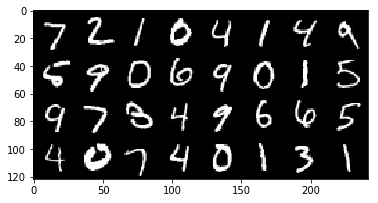

In [11]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
import torchvision
import numpy as np


def imshow(img):
    img = img      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
imshow(torchvision.utils.make_grid(images))
print(labels.size())


In [12]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images = images.view(batch_size, 28*28)
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

RuntimeError: invalid argument 2: size '[32 x 784]' is invalid for input with 12544 elements at /pytorch/torch/lib/TH/THStorage.c:41

# Exercise 1: 

Change the batch size to 200 and try calculating the loss and accuracy for both the training and testing data

# Exercise 2:

Change the batch size to 5 and mini batch to 1000. Try calculating the loss and accuracy for both the training and testing data